In [1]:
import pandas as pd

In [2]:
lcn =  pd.read_csv(r"C:\Users\Amol purkar\Desktop\Imarticus\Python\LungCapData.csv")

In [4]:
lcn.head(10)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
5,6.225,11,58.7,no,female,no
6,4.950,8,63.3,no,male,yes
7,7.325,11,70.4,no,male,no
8,8.875,15,70.5,no,male,no
9,6.800,11,59.2,no,male,no


In [5]:
lcn.Smoke = lcn.Smoke.replace({'no':0,'yes':1})
lcn.Gender= lcn.Gender.replace({'male':0,'female':1})
lcn.Caesarean= lcn.Caesarean.replace({'no':0,'yes':1})

In [6]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [7]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


In [8]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
lcn_train, lcn_test = train_test_split(lcn, test_size = .2)

In [12]:
lcn_train_x = lcn_train.iloc[:, 1::]
lcn_test_x = lcn_test.iloc[: , 1::]

In [13]:
lcn_train_y = lcn_train.iloc[:, 0]
lcn_test_y = lcn_test.iloc[: , 0]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression()

In [17]:
linreg.fit(lcn_train_x, lcn_train_y)

LinearRegression()

In [18]:
lcn_train_x.head()

,Age,Height,Smoke,Gender,Caesarean
237,11,67.1,1,0,0
583,8,55.1,0,1,0
453,13,75.3,0,0,0
127,19,76.2,0,1,1
402,15,69.1,0,1,1


In [19]:
Rsquare = linreg.score(lcn_train_x, lcn_train_y)
Rsquare

0.8529008820117225

In [20]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

In [21]:
Adj_Rsquare = 1 - (1-Rsquare) * (N-1)/(N-K-1)
Adj_Rsquare

0.8516195308097341

In [25]:
pred_train =linreg.predict(lcn_train_x)
pred_test= linreg.predict(lcn_test_x)

In [26]:
pred_test

array([ 7.89237339,  5.46702532,  8.05205076,  7.13145858, 10.14662125,
        5.26859147,  9.15854699,  5.78887633, 10.74923107,  9.80822739,
        8.54934252,  7.31418807,  8.45327854,  6.75442934,  5.62778708,
        9.18657472,  9.25209141,  8.74179799,  7.1503766 ,  5.0512396 ,
        9.21147112, 11.61110386, 10.26743723,  2.34302297,  6.4655824 ,
        7.26357635, 11.0169292 ,  9.02194432, 11.97193731,  9.87491007,
        4.95918867, 10.39894251,  6.24659269,  8.43049188,  6.97341905,
        9.37223288,  7.20098833,  4.22024159,  9.44937885,  5.04090115,
        7.36561872,  4.38018443,  8.606077  ,  4.04234408,  3.40979944,
        4.38018443,  4.44134105,  9.21875985,  8.56260964, 11.47218879,
        5.15246305,  6.48482791,  9.98823465, 10.2748508 ,  6.2885038 ,
        8.8454782 ,  3.11741135, 11.60381513,  8.88364173,  4.84306025,
        2.43179823,  7.77870174,  6.44959305,  5.8264469 ,  3.15182729,
        4.47657591,  4.48984303,  5.79792775,  8.97690189,  7.23

In [28]:
err_test = lcn_test_y -pred_test
err_test

In [30]:
import numpy as np
mse = np.mean(np.square(err_test))
mse

1.1284031864734807

In [31]:
rmse = np.sqrt(mse)
rmse

1.0622632378433703

In [32]:
mape = np.mean(np.abs(err_test*100/lcn_test_y))
mape
# therefore accuracy is around 88.29

13.413035401018432

In [50]:
err_train = lcn_train_y - pred_train
err_test

35     0.932627
532    0.307975
489   -1.327051
372   -0.206459
521   -0.296621
         ...   
621    0.151224
667    0.183342
444   -0.906752
242    0.837554
153   -0.106687
Name: LungCap, Length: 145, dtype: float64

In [36]:
np.mean(err_train)

-1.3713168531749347e-15

In [37]:
import matplotlib.pyplot as plt

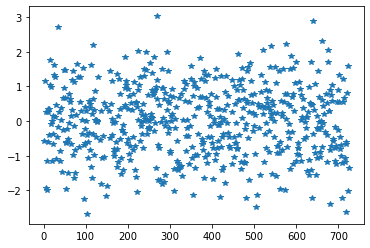

In [38]:
plt.plot(err_train, '*')

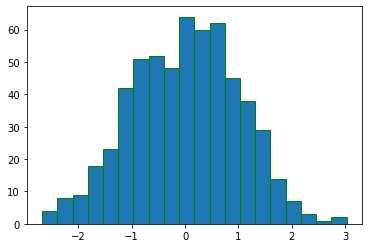

In [39]:
plt.hist(err_train , bins = 20 , edgecolor = "g");

In [40]:
pred_actual_df = pd.DataFrame()

In [41]:
pred_actual_df["Actual"] = lcn_train_y
pred_actual_df["Predict"] = pred_train

In [42]:
pred_actual_df.head()

,Actual,Predict
237,7.925,7.922574
583,4.450,4.528825
453,10.450,10.915152
127,11.700,11.685528
402,8.425,9.189503


In [43]:
import seaborn as sns

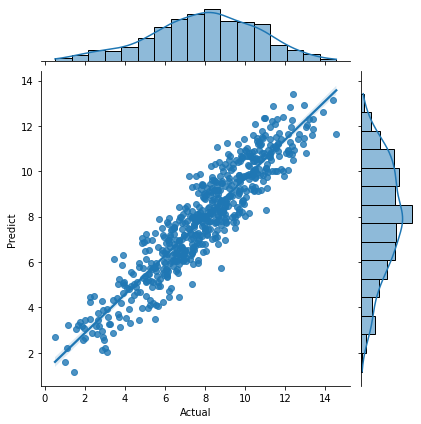

In [44]:
sns.jointplot(x = "Actual", y = "Predict", data = pred_actual_df , kind = "reg")

In [45]:
# remove the outliers

In [46]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd= df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed ===>"  ,  df.shape[0] - df1.shape[0])

In [48]:
remove_outliers(lcn, "LungCap" , 2)

(695, 6)
Number of outliers removed ===> 30


In [49]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0
